In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('lm_data.csv')

# 1 Categorical Variables

lower ci: 7.8081745963202e-06; upper ci: 5.401820757964277
Chi2: 0.5697619858858407
p-value: 0.450353512346385


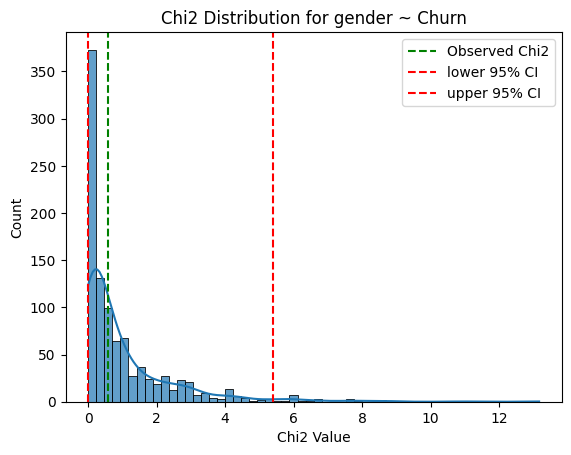

lower ci: 2.002398858363493e-05; upper ci: 4.482758680362669
Chi2: 159.26811967875054
p-value: 1.63514998390966e-36


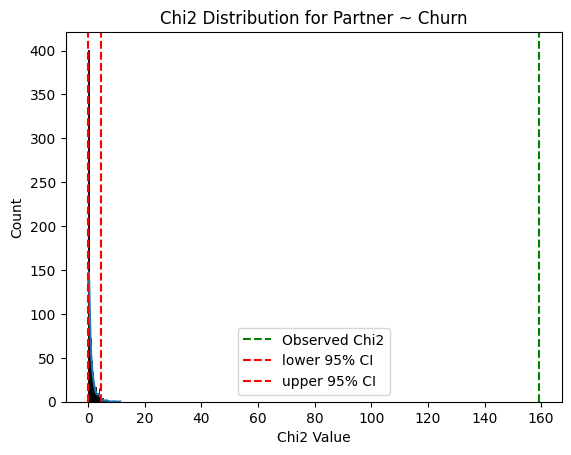

lower ci: 0.00020769251364501003; upper ci: 5.104213466704735
Chi2: 191.48732227526375
p-value: 1.5055223510269915e-43


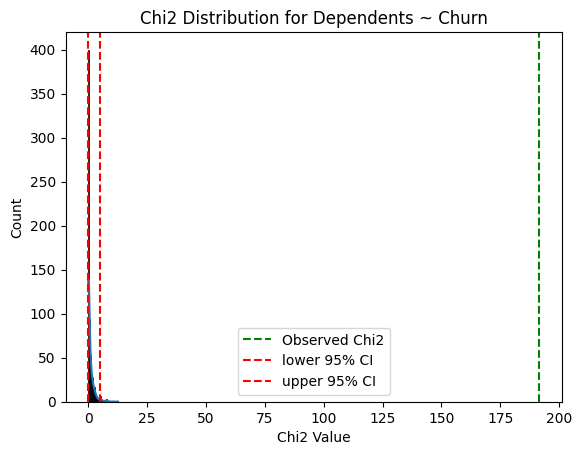

lower ci: 0.0; upper ci: 4.533284261251519
Chi2: 162.90004321471173
p-value: 2.6306207165410168e-37


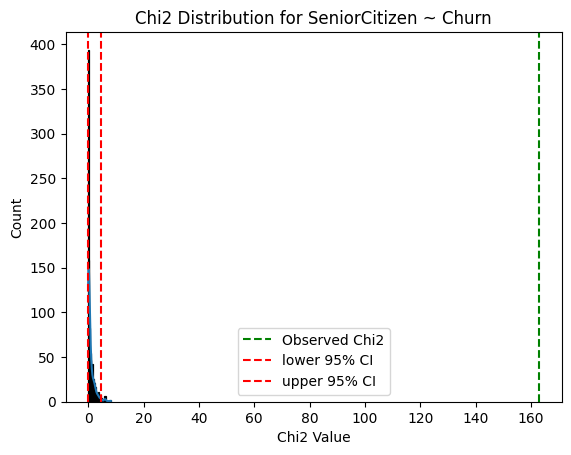

lower ci: 3.4970770409799946e-05; upper ci: 4.8820246633621105
Chi2: 261.87814622279217
p-value: 6.685450416128118e-59


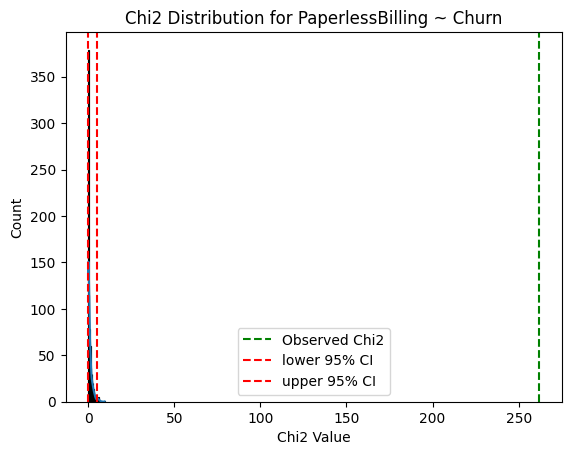

lower ci: 0.2386704373138673; upper ci: 9.502237083375068
Chi2: 651.7189842626278
p-value: 6.175267784387533e-141


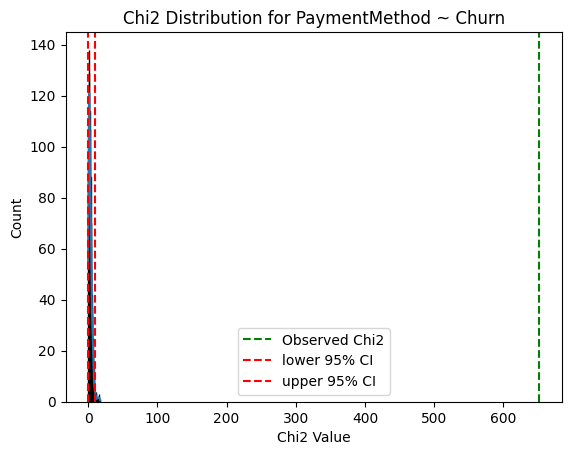

lower ci: 0.0; upper ci: 4.8150074384531605
Chi2: 1.0189475761956581
p-value: 0.31276877715252804


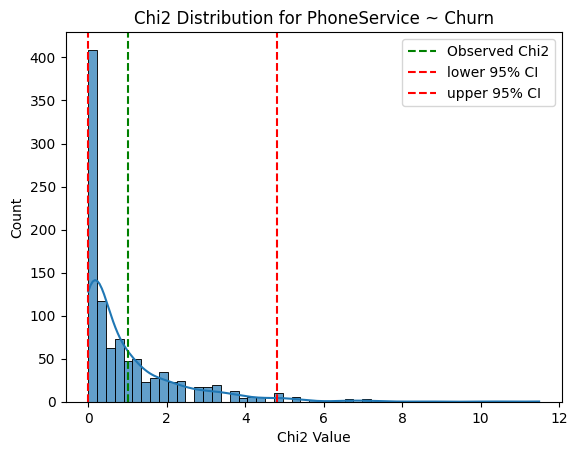

lower ci: 0.04153467389583155; upper ci: 7.383117575803286
Chi2: 1205.4637030070103
p-value: 1.7253723132019176e-262


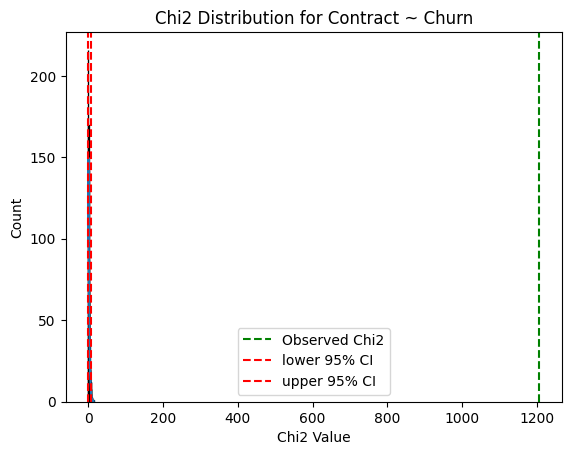

lower ci: 0.05120836442641256; upper ci: 7.796102512959852
Chi2: 743.4480155182436
p-value: 3.650183009453061e-162


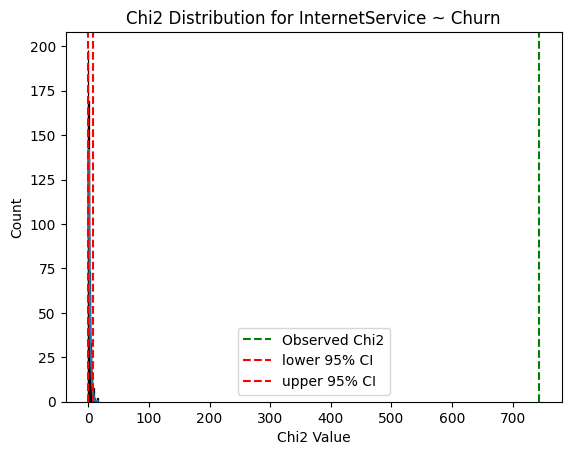

lower ci: 0.00092268909956736; upper ci: 5.299541804060473
Chi2: 7024.85450970604
p-value: 0.0


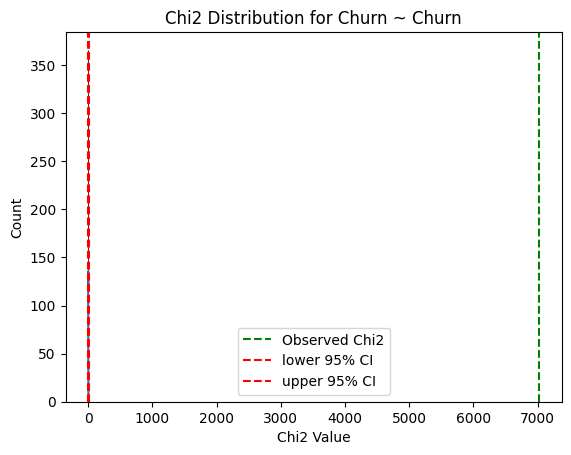

In [3]:
cat_var_subset = data[['gender','Partner','Dependents','SeniorCitizen','PaperlessBilling','PaymentMethod','PhoneService','Contract','InternetService','Churn']].copy()

for col in cat_var_subset.columns:

    #Save Chi2 results in list
    results = []

    np.random.seed(123)

    if cat_var_subset[col].dtype != 'Churn':

        #Calculate Chi2 for observed data
        observed_conting = pd.crosstab(cat_var_subset[col], cat_var_subset['Churn'])
        observed_chi2, observed_p, _, _ = chi2_contingency(observed_conting)

        #Perform 1000 permutations
        for i in range(1000):
            x_permuted = np.random.permutation(cat_var_subset[col].values)
            chi2_conting = pd.crosstab(x_permuted, cat_var_subset['Churn'])
            chi2, _, _, _ = chi2_contingency(chi2_conting)
            results.append(chi2)

        #Calculate 95% confidence interval (two-tailed)
        ci_lower, ci_upper = np.percentile(results, [2.5, 97.5])

        #Plot
        print(f'lower ci: {ci_lower}; upper ci: {ci_upper}')
        print('Chi2:',observed_chi2)
        print(f'p-value: {observed_p}')
        sns.histplot(results, kde=True, alpha=0.7)
        plt.title(f'Chi2 Distribution for {col} ~ Churn')
        plt.axvline(observed_chi2, linestyle='--', color='green', label='Observed Chi2')
        plt.axvline(ci_lower, linestyle='--', color='red', label='lower 95% CI')
        plt.axvline(ci_upper, linestyle='--', color='red', label='upper 95% CI')
        plt.xlabel('Chi2 Value')
        plt.legend()
        plt.show()

# 2 Categorical Variables with level no internet Service

lower ci: 0.0007016951408838197; upper ci: 5.101017032664871
Chi2: 431.20506521074674
p-value: 8.88395906293561e-96


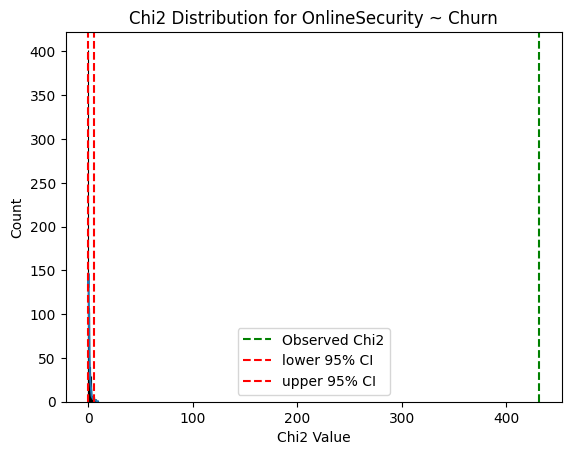

lower ci: 0.0005415688423181309; upper ci: 5.333315018968209
Chi2: 208.4926503003499
p-value: 2.929087193767152e-47


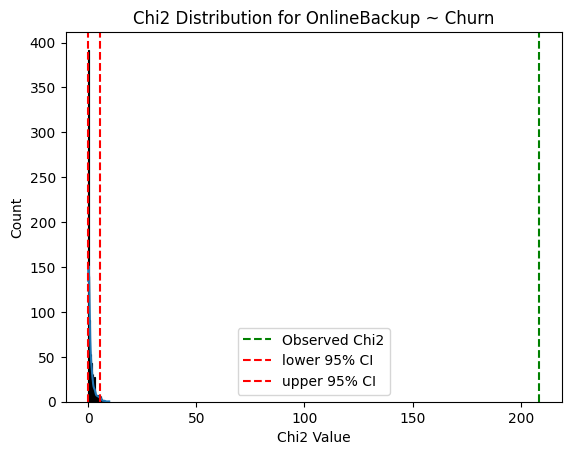

lower ci: 0.0006270149005568108; upper ci: 5.063936033847501
Chi2: 172.97808966232878
p-value: 1.654833100795796e-39


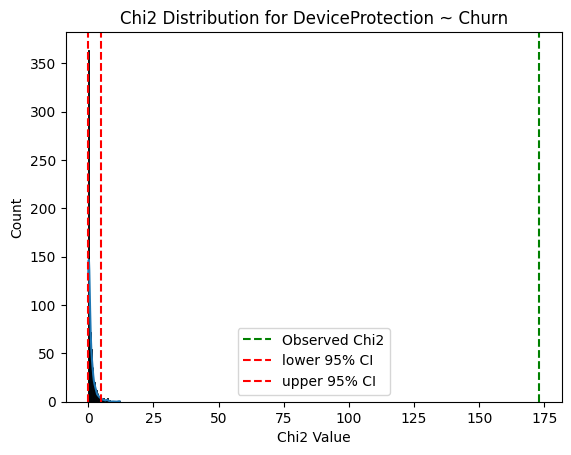

lower ci: 7.638919569806377e-05; upper ci: 4.881608772782665
Chi2: 415.12034975933403
p-value: 2.8156228053243093e-92


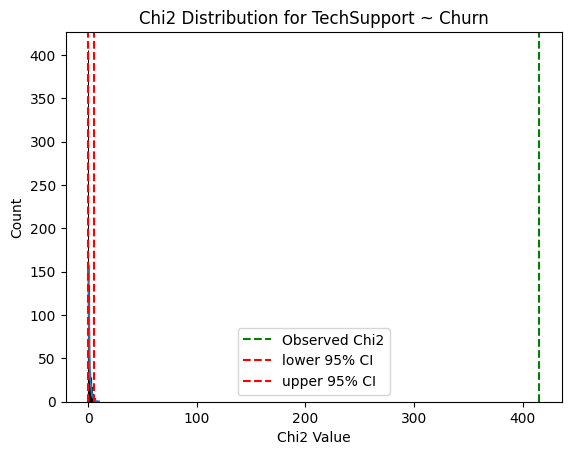

lower ci: 0.00012074336561197188; upper ci: 4.896290394678054
Chi2: 7.789820279640622
p-value: 0.005254142174852827


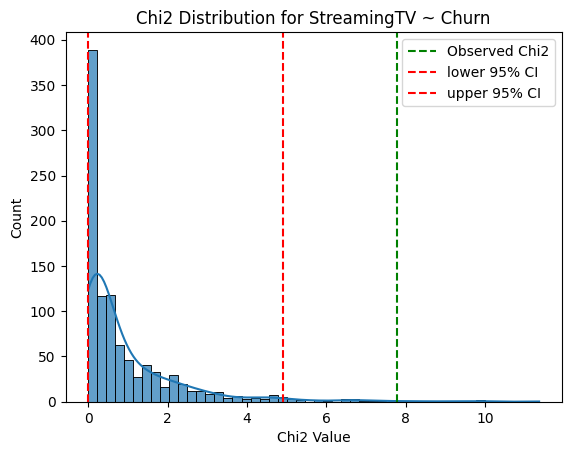

lower ci: 0.0006223342797436233; upper ci: 4.699857344164865
Chi2: 8.872345397595861
p-value: 0.0028952293364705507


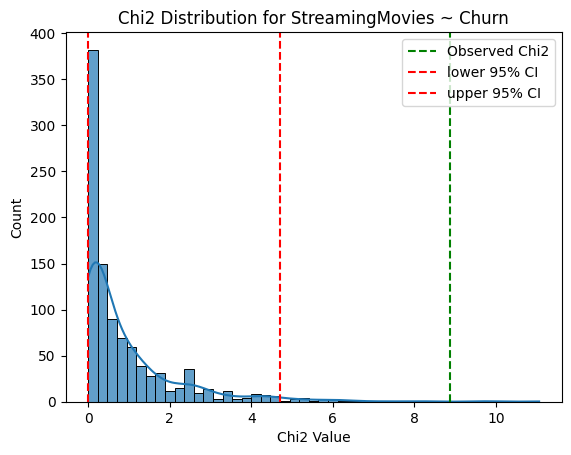

lower ci: 0.04435383033284059; upper ci: 7.198328108757095
Chi2: 19.22880221800278
p-value: 6.676035717825459e-05


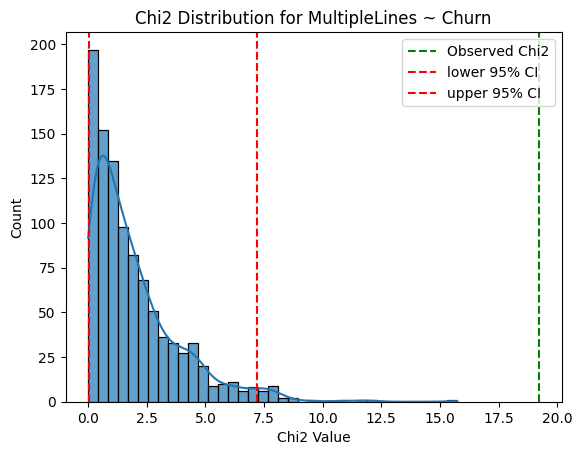

In [4]:
cat_var__no_internet_subset = data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines','Churn','InternetService']].copy()
cat_var__no_internet_subset_filter = cat_var__no_internet_subset[cat_var__no_internet_subset.InternetService != 'No']


for col in cat_var__no_internet_subset_filter.columns:

    #Save Chi2 results in list
    results = []

    np.random.seed(123)

    if col not in ['Churn','InternetService']:

        #Calculate Chi2 for observed data
        observed_conting = pd.crosstab(cat_var__no_internet_subset_filter[col], cat_var__no_internet_subset_filter['Churn'])
        observed_chi2, observed_p, _, _ = chi2_contingency(observed_conting)

        #Perform 1000 permutations
        for i in range(1000):
            x_permuted = np.random.permutation(cat_var__no_internet_subset_filter[col].values)
            chi2_conting = pd.crosstab(x_permuted, cat_var__no_internet_subset_filter['Churn'])
            chi2, _, _, _ = chi2_contingency(chi2_conting)
            results.append(chi2)

        #Calculate 95% confidence interval (two-tailed)
        ci_lower, ci_upper = np.percentile(results, [2.5, 97.5])

        #Plot
        print(f'lower ci: {ci_lower}; upper ci: {ci_upper}')
        print('Chi2:',observed_chi2)
        print(f'p-value: {observed_p}')
        sns.histplot(results, kde=True, alpha=0.7)
        plt.title(f'Chi2 Distribution for {col} ~ Churn')
        plt.axvline(observed_chi2, linestyle='--', color='green', label='Observed Chi2')
        plt.axvline(ci_lower, linestyle='--', color='red', label='lower 95% CI')
        plt.axvline(ci_upper, linestyle='--', color='red', label='upper 95% CI')
        plt.xlabel('Chi2 Value')
        plt.legend()
        plt.show()